In [2]:
import scSherlock as sh
import scanpy as sc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
adata = sc.read_h5ad('/home/croizer/Desktop/caibi/pbmc_LT.h5ad')
cell_type_column = "predicted.celltype.l3"
patient_column = "orig.ident"


In [4]:
#adata = sc.read_h5ad('/home/croizer/pbmc_LT.h5ad')
#cell_type_column = "predicted.celltype.l3"
#patient_column = "orig.ident"

In [3]:

adata = sc.read_h5ad('/home/croizer/Downloads/HBCA_reed_2024.h5ad')
cell_type_column = "author_cell_type"
patient_column = "donor_id"


In [4]:
# Create configuration
config = sh.ScSherlockConfig(
    k_values=[1, 10, 25],
    scoring_method=sh.ScoringMethod.DIFF,
    aggregation_method=sh.AggregationMethod.MEAN,
    max_genes_kept=100,
    min_patients=3,
    min_reads=10,
    sparse_step=5,
    n_jobs=-1
)

# Initialize SCherlock
scherlock = sh.ScSherlock(
    adata=adata,
    column_patient=patient_column,
    config=config
)

2025-04-07 13:15:07,992 - ScSherlock - INFO - ScSherlock initialized with (714331, 33145) data matrix


In [5]:
top_markers = scherlock.run(column_ctype=cell_type_column, method='empiric')


2025-04-07 13:15:09,375 - ScSherlock - INFO - Calculating theoretical scores for author_cell_type...
Aggregating Samples: 100%|██████████| 7308/7308 [00:03<00:00, 2435.46it/s]


KeyboardInterrupt: 

In [ ]:
adata.obs

In [49]:
annotation_columns = ['celltype.l1', 'celltype.l2', 'celltype.l3']
annotation_columns = ['predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3']
scherlock.create_hierarchy_graph(annotation_columns,  min_proportion=0.03)

In [14]:
adata.obs[annotation_columns]

,predicted.celltype.l1,predicted.celltype.l2,predicted.celltype.l3
AAGCGGCAACAAATTTGC_1,Mono,CD14 Mono,CD14 Mono
CTCGCAGCCCTCTAAGGG_1,Mono,CD16 Mono,CD16 Mono
CAACAATTTAGGCCATCT_1,DC,pDC,pDC
CTCGCATTCATAAGTTTA_1,Mono,CD16 Mono,CD16 Mono
TCTACCGGGCGAATTTGC_1,Mono,CD16 Mono,CD16 Mono
...,...,...,...
S2521_X24088_5.176_34,other T,gdT,gdT_1
S2521_X24088_6.177_34,NK,NK_CD56bright,NK_CD56bright
S2521_X24088_5.132_34,NK,NK_CD56bright,NK_CD56bright
S2521_X24088_5.183_34,NK,NK_CD56bright,NK_CD56bright


In [38]:
fig = scherlock.visualize_hierarchy()

2025-04-07 10:06:24,085 - ScSherlock - ERROR - Error with graphviz_layout: division by zero
2025-04-07 10:06:24,086 - ScSherlock - ERROR - Make sure Graphviz is installed:
2025-04-07 10:06:24,086 - ScSherlock - ERROR -   Ubuntu/Debian: sudo apt-get install graphviz graphviz-dev
2025-04-07 10:06:24,086 - ScSherlock - ERROR -   macOS: brew install graphviz
2025-04-07 10:06:24,086 - ScSherlock - ERROR -   Windows: Download from https://graphviz.org/download/
2025-04-07 10:06:24,087 - ScSherlock - ERROR - Then install pygraphviz: pip install pygraphviz


<Figure size 2000x1200 with 0 Axes>

2025-04-04 11:15:14,506 - ScSherlock - INFO - Found empirical marker scores for author_cell_type


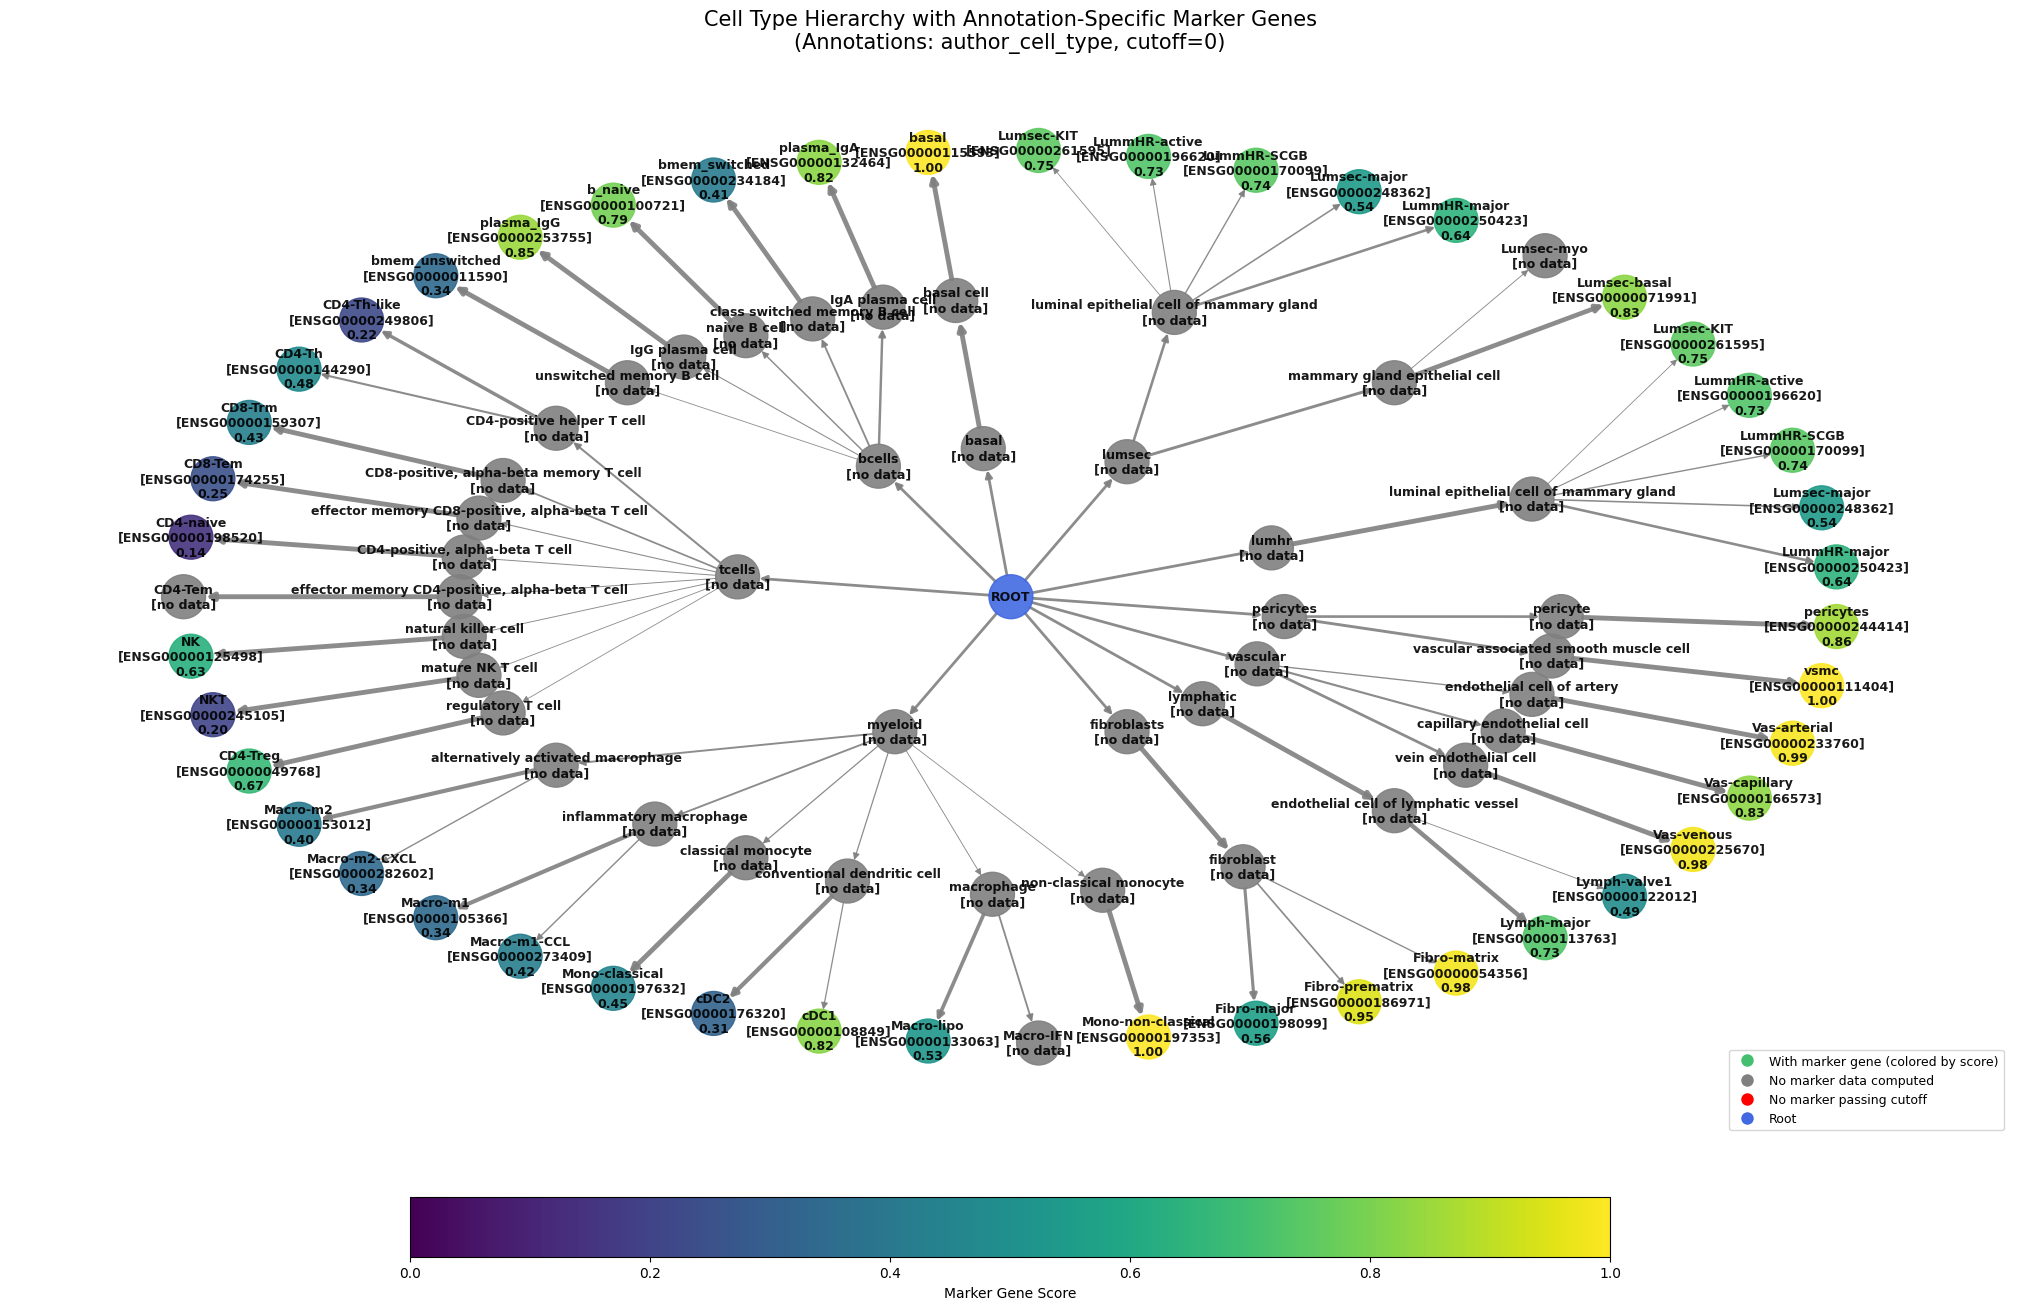

In [17]:
fig = scherlock.visualize_hierarchy_marker(cutoff=0)

2025-04-04 11:15:14,506 - ScSherlock - INFO - Found empirical marker scores for author_cell_type


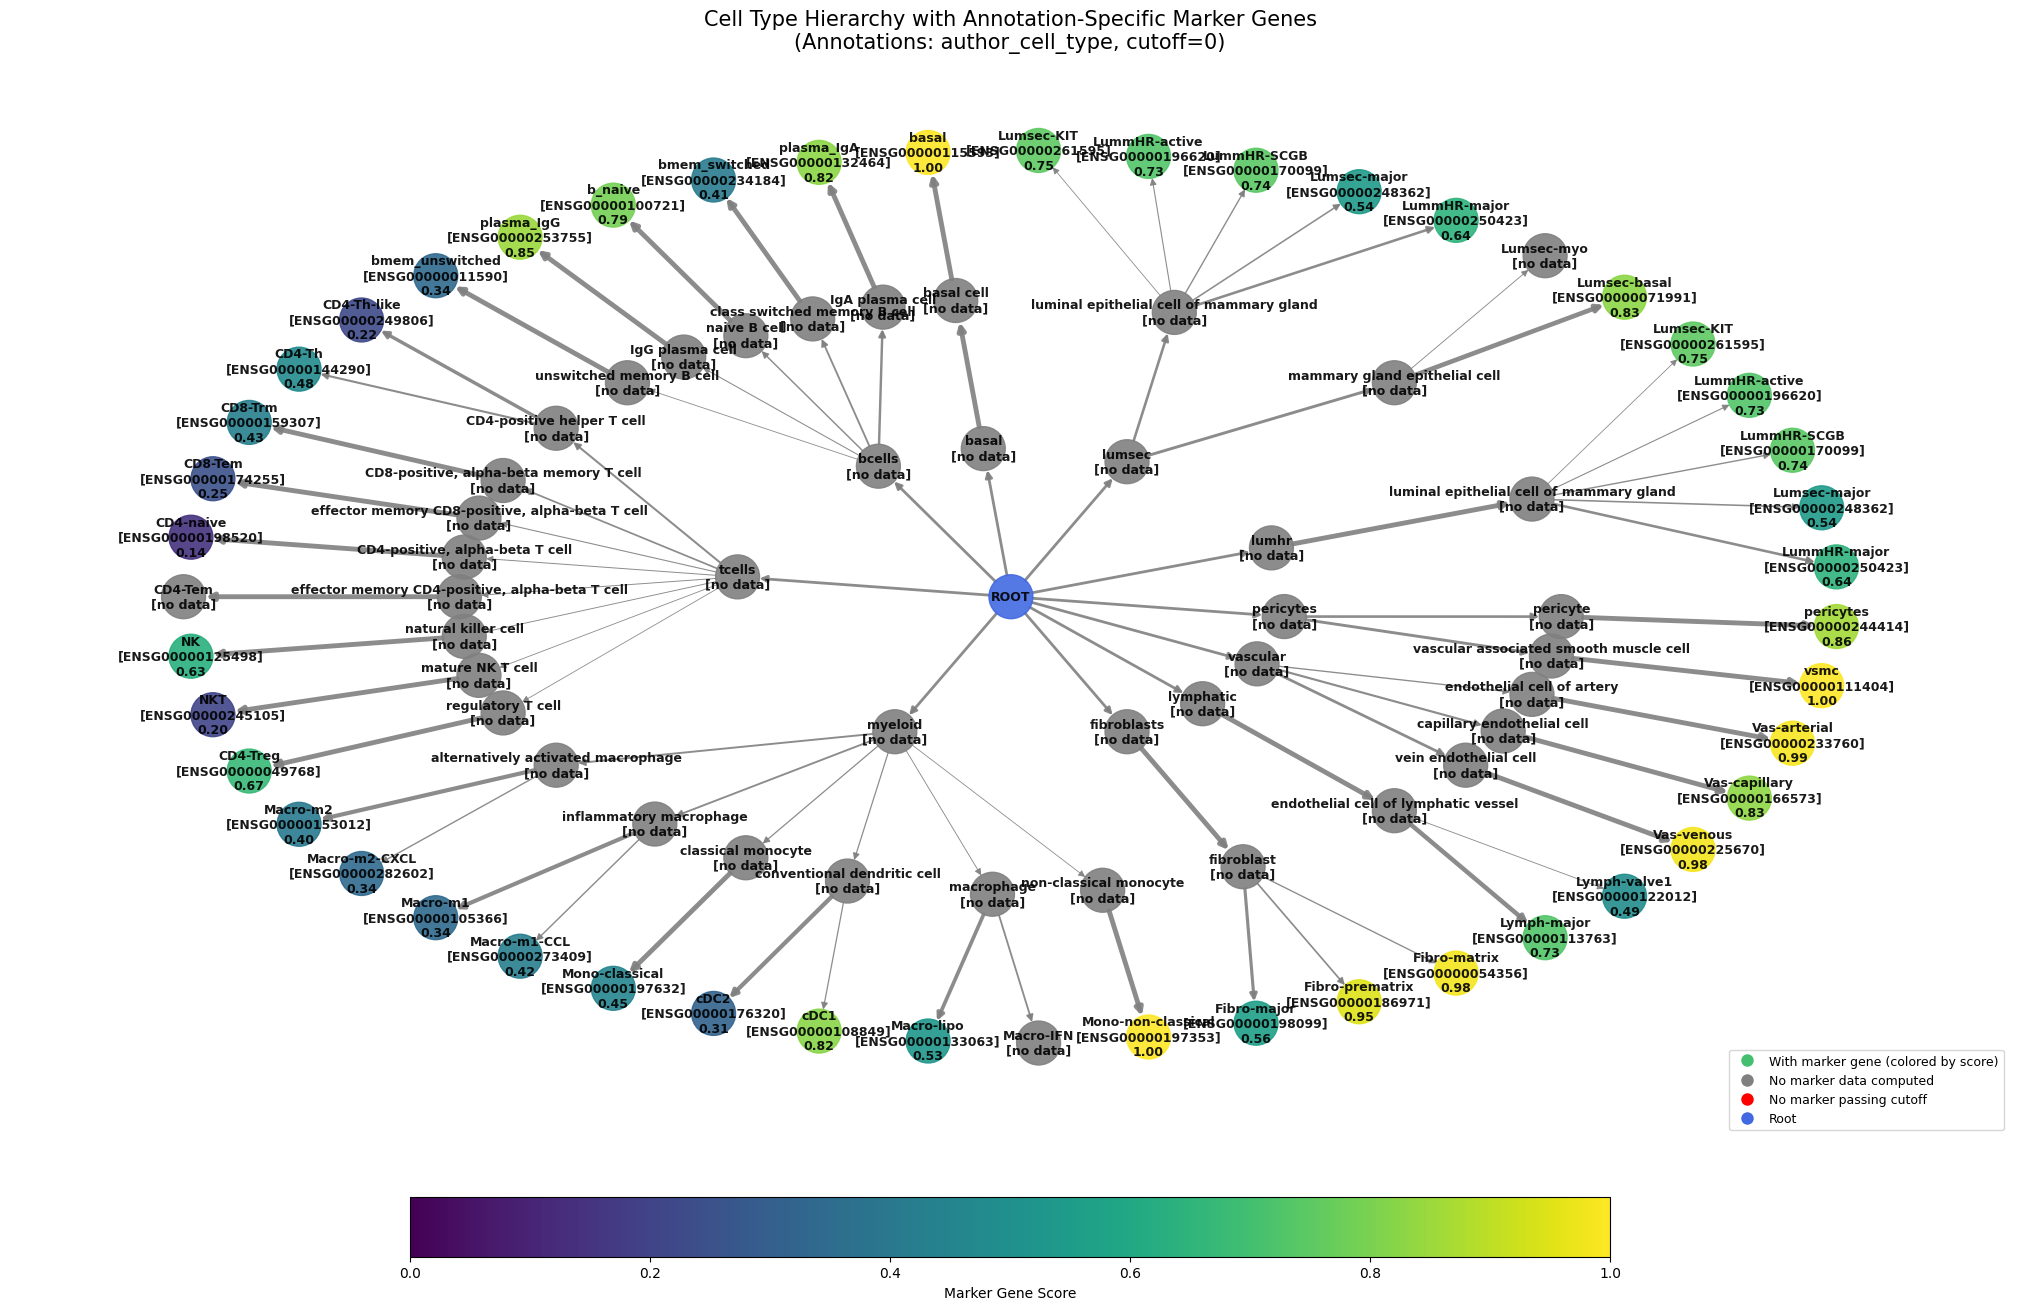

In [ ]:
fig = scherlock.visualize_hierarchy_marker(cutoff=0)

In [19]:
top_markers = scherlock.run(column_ctype="predicted.celltype.l2", method='empiric')

2025-04-04 09:40:50,955 - ScSherlock - INFO - Calculating theoretical scores for predicted.celltype.l2...
Aggregating Samples: 100%|██████████| 1767/1767 [00:00<00:00, 7159.48it/s]
2025-04-04 09:40:58,471 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-04 09:40:58,472 - ScSherlock - INFO - Applying multi-category correction...
2025-04-04 09:40:58,491 - ScSherlock - INFO - Aggregating scores...
2025-04-04 09:40:58,507 - ScSherlock - INFO - Sorting scores...
2025-04-04 09:40:58,538 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 1767/1767 [00:00<00:00, 7147.52it/s]


0       orig.ident_simplified::P1--predicted.celltype....
1       orig.ident_simplified::P1--predicted.celltype....
2       orig.ident_simplified::P1--predicted.celltype....
3       orig.ident_simplified::P1--predicted.celltype....
4       orig.ident_simplified::P1--predicted.celltype....
                              ...                        
1239    orig.ident_simplified::P9--predicted.celltype....
1240    orig.ident_simplified::P9--predicted.celltype....
1241    orig.ident_simplified::P9--predicted.celltype....
1242    orig.ident_simplified::P9--predicted.celltype....
1243    orig.ident_simplified::P9--predicted.celltype....
Name: SampleName, Length: 1244, dtype: object


Aggregating Samples: 100%|██████████| 31/31 [00:00<00:00, 146.17it/s]
2025-04-04 09:40:59,530 - ScSherlock - INFO - Calculating empirical scores...


Cell types in sorted_table: dict_keys(['CD14 Mono', 'CD16 Mono', 'pDC', 'cDC2', 'CD4 TCM', 'NK', 'CD8 TEM', 'cDC1', 'CD4 Naive', 'CD8 TCM', 'ASDC', 'NK Proliferating', 'Treg', 'MAIT', 'CD4 CTL', 'B intermediate', 'CD4 TEM', 'CD8 Naive', 'B naive', 'B memory', 'CD4 Proliferating', 'CD8 Proliferating', 'Plasmablast', 'dnT', 'Eryth', 'gdT', 'NK_CD56bright', 'HSPC', 'Platelet', 'ILC', 'Doublet'])
Cell types in ctype_n_patients: ['ASDC', 'B intermediate', 'B memory', 'B naive', 'CD14 Mono', 'CD16 Mono', 'CD4 CTL', 'CD4 Naive', 'CD4 Proliferating', 'CD4 TCM', 'CD4 TEM', 'CD8 Naive', 'CD8 Proliferating', 'CD8 TCM', 'CD8 TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK Proliferating', 'NK_CD56bright', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


2025-04-04 09:41:44,756 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-04 09:41:44,762 - ScSherlock - INFO - Sorting empirical scores...
2025-04-04 09:41:44,781 - ScSherlock - INFO - Identifying top markers...
2025-04-04 09:41:44,782 - ScSherlock - INFO - ScSherlock completed. Found markers for 16/31 cell types


2025-04-04 10:07:33,137 - ScSherlock - INFO - Found empirical marker scores for predicted.celltype.l3
2025-04-04 10:07:33,138 - ScSherlock - INFO - Found empirical marker scores for predicted.celltype.l1
2025-04-04 10:07:33,138 - ScSherlock - INFO - Found empirical marker scores for predicted.celltype.l2


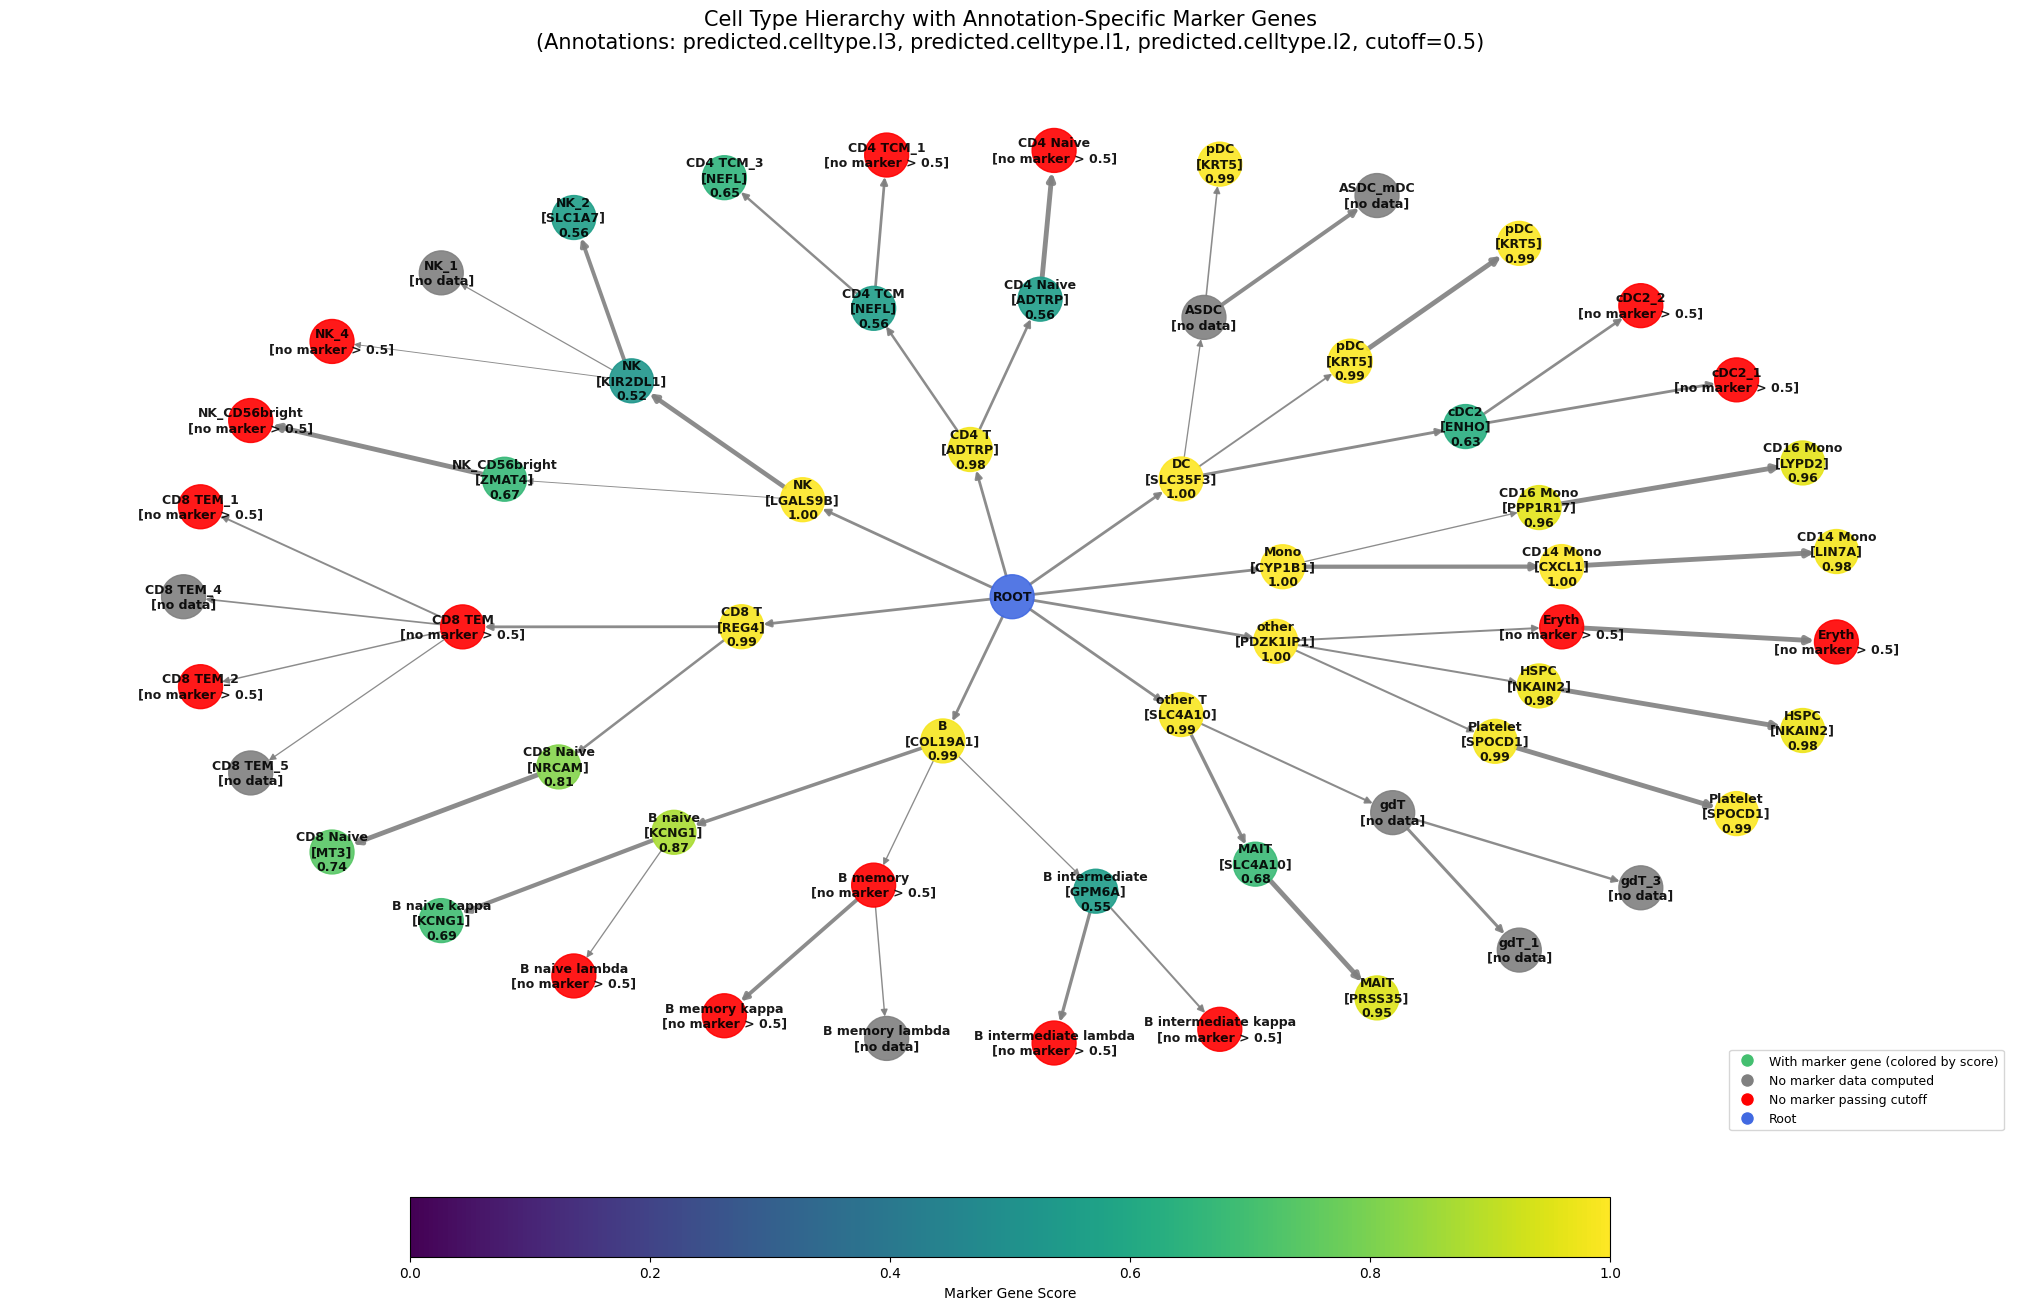

In [46]:
fig = scherlock.visualize_hierarchy_marker(cutoff=0.5)

In [18]:
top_markers = scherlock.run(column_ctype="predicted.celltype.l1", method='empiric')

2025-04-04 09:40:31,461 - ScSherlock - INFO - Calculating theoretical scores for predicted.celltype.l1...
Aggregating Samples: 100%|██████████| 456/456 [00:00<00:00, 2347.39it/s]
2025-04-04 09:40:33,882 - ScSherlock - INFO - Completed theoretical score calculation
2025-04-04 09:40:33,883 - ScSherlock - INFO - Applying multi-category correction...
2025-04-04 09:40:33,889 - ScSherlock - INFO - Aggregating scores...
2025-04-04 09:40:33,893 - ScSherlock - INFO - Sorting scores...
2025-04-04 09:40:33,902 - ScSherlock - INFO - Filtering genes...
Aggregating Samples: 100%|██████████| 456/456 [00:00<00:00, 2661.86it/s]


0      orig.ident_simplified::P1--predicted.celltype....
1      orig.ident_simplified::P1--predicted.celltype....
2      orig.ident_simplified::P1--predicted.celltype....
3      orig.ident_simplified::P1--predicted.celltype....
4      orig.ident_simplified::P1--predicted.celltype....
                             ...                        
416    orig.ident_simplified::P9--predicted.celltype....
417    orig.ident_simplified::P9--predicted.celltype....
418    orig.ident_simplified::P9--predicted.celltype....
419    orig.ident_simplified::P9--predicted.celltype....
420    orig.ident_simplified::P9--predicted.celltype....
Name: SampleName, Length: 421, dtype: object


Aggregating Samples: 100%|██████████| 8/8 [00:00<00:00, 40.62it/s]
2025-04-04 09:40:34,664 - ScSherlock - INFO - Calculating empirical scores...


Cell types in sorted_table: dict_keys(['Mono', 'DC', 'CD4 T', 'NK', 'CD8 T', 'B', 'other T', 'other'])
Cell types in ctype_n_patients: ['B', 'CD4 T', 'CD8 T', 'DC', 'Mono', 'NK', 'other', 'other T']


2025-04-04 09:40:50,433 - ScSherlock - INFO - Aggregating empirical scores...
2025-04-04 09:40:50,435 - ScSherlock - INFO - Sorting empirical scores...
2025-04-04 09:40:50,441 - ScSherlock - INFO - Identifying top markers...
2025-04-04 09:40:50,441 - ScSherlock - INFO - ScSherlock completed. Found markers for 8/8 cell types


In [32]:
adata

AnnData object with n_obs × n_vars = 246310 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'CELL_ID', 'SAMPLE_ID', 'TISSUE', 'PROJECT', 'Percent_Mito', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'isDoublet', 'nCount_ADT', 'nFeature_ADT', 'S.Score', 'G2M.Score', 'Phase', 'CELL_TYPE', 'SUBTISSUE', 'SCA_PID', 'SCA_SID', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'orig.ident_simplified'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'pca', 'neighbors', 'umap', 'predicted.celltype.l2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

2025-04-04 10:07:12,272 - ScSherlock - INFO - Found empirical marker scores for predicted.celltype.l3
2025-04-04 10:07:12,273 - ScSherlock - INFO - Found empirical marker scores for predicted.celltype.l1
2025-04-04 10:07:12,274 - ScSherlock - INFO - Found empirical marker scores for predicted.celltype.l2


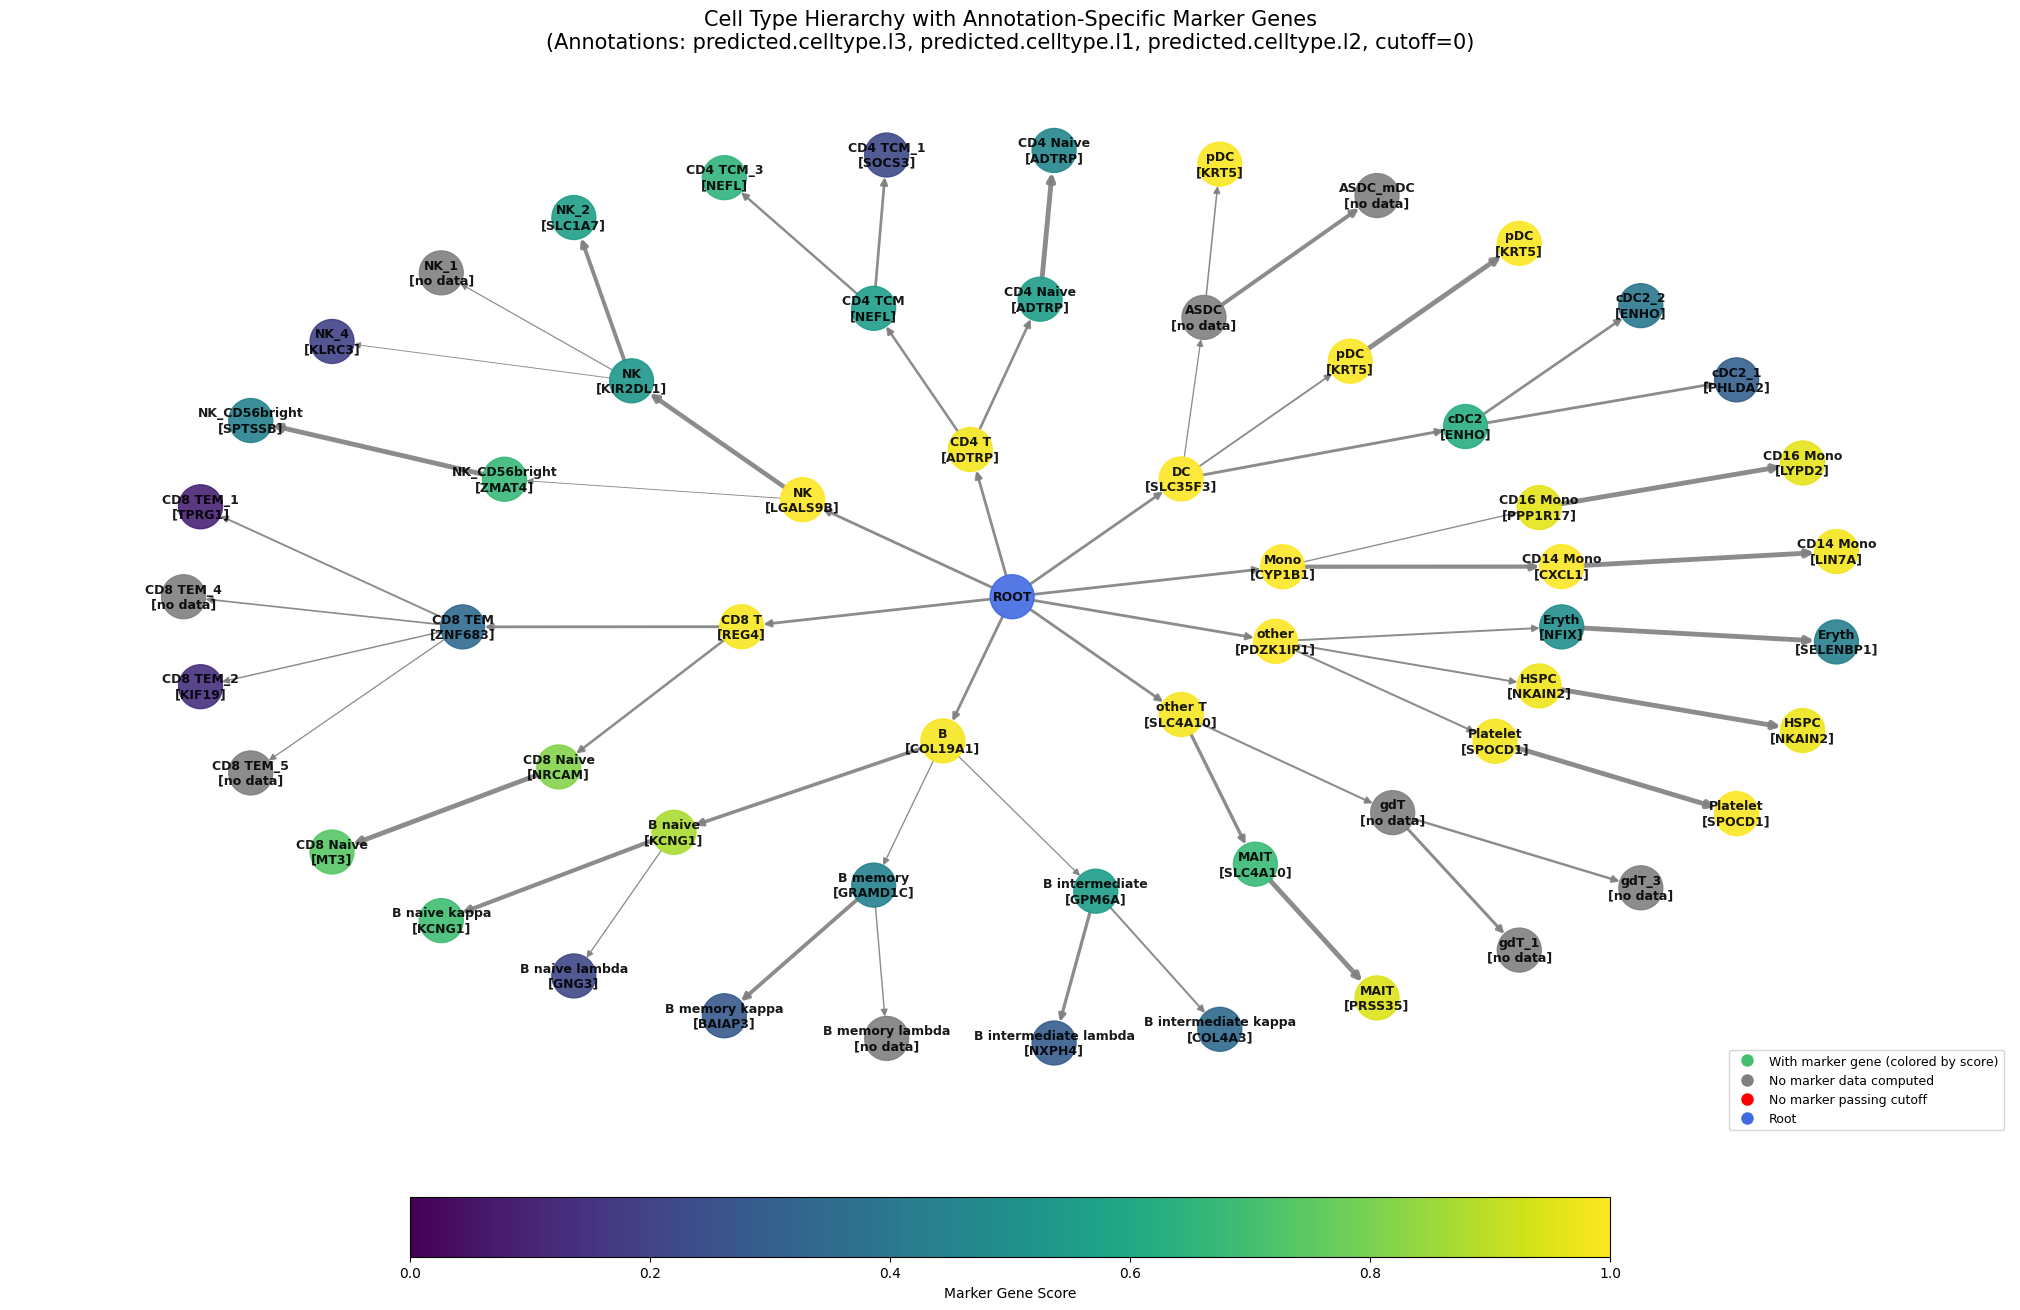

In [45]:
fig = scherlock.visualize_hierarchy_marker(cutoff=0, show_score=False)

In [38]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [40]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [41]:
sc.tl.pca(adata)

In [42]:
sc.pp.neighbors(adata)


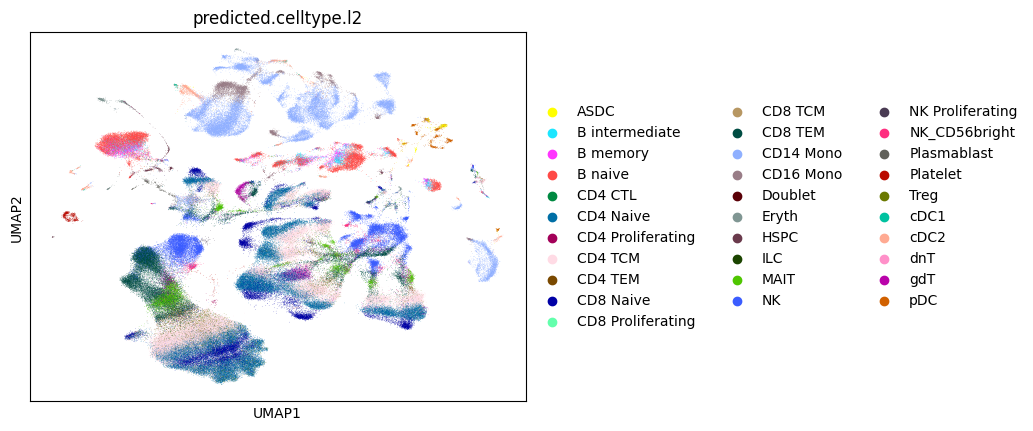

In [43]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='predicted.celltype.l2')

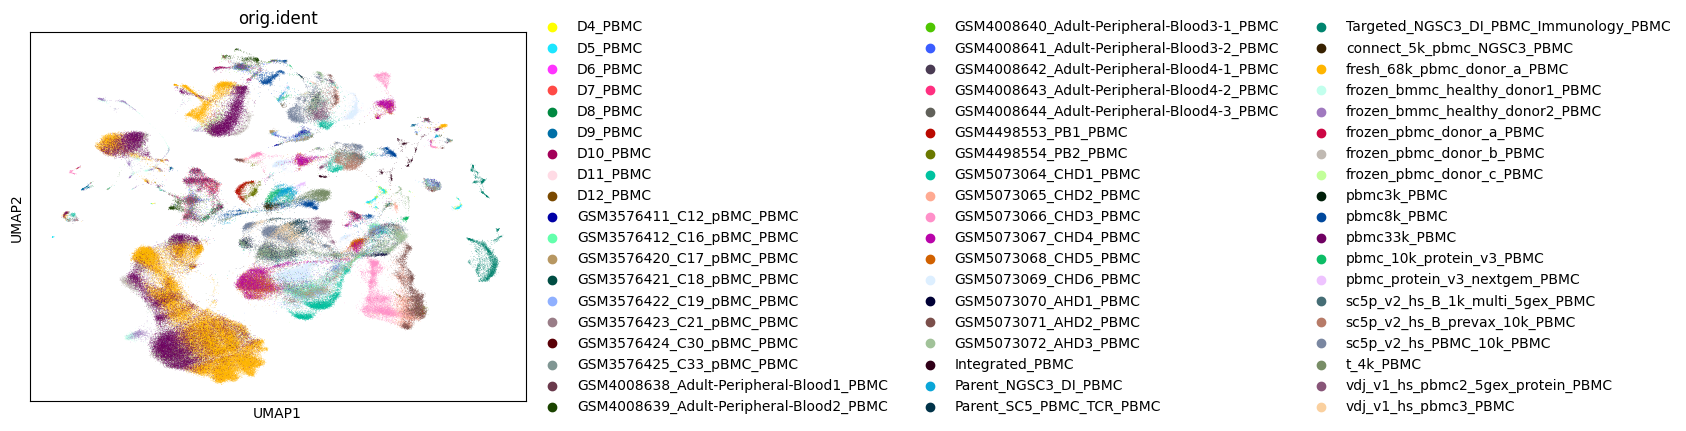

In [44]:
sc.pl.umap(adata, color='orig.ident')

In [29]:
adata.X[1:5, 1:5].todense()

matrix([[0.76726058, 0.        , 0.        , 0.        ],
        [0.79561201, 0.79561201, 0.79561201, 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [1.20139494, 0.        , 1.20139494, 0.        ]])

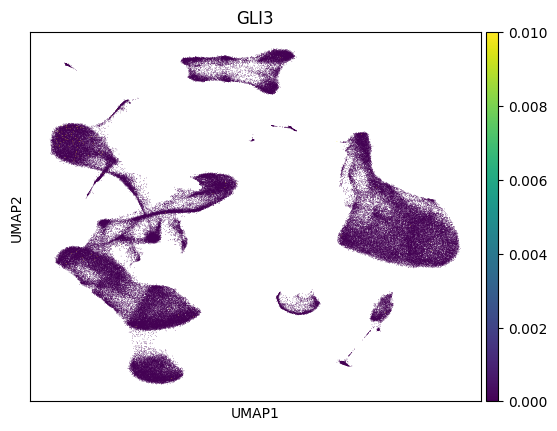

In [23]:
sc.pl.umap(adata, color='GLI3' ,use_raw=False,vmax=0.01)

In [ ]:
sc.pl.umap(adata, color='celltype.l2')

In [13]:
scherlock.sorted_empirical_table['celltype.l1']

{'Mono':                 1        10        25  aggregated  exp_prop
 FPR1     1.000000  1.000000  1.000000    1.000000  0.000312
 LRRK2    1.000000  1.000000  1.000000    1.000000  0.000308
 MEGF9    1.000000  1.000000  1.000000    1.000000  0.000290
 EVI2A    1.000000  1.000000  1.000000    1.000000  0.000283
 DUSP6    1.000000  1.000000  1.000000    1.000000  0.000274
 ...           ...       ...       ...         ...       ...
 IER2     0.644898  0.878706  0.805802    0.776469  0.000739
 C6orf62  0.653386  0.820144  0.825255    0.766262  0.000197
 HMGB2    0.643979  0.774545  0.872504    0.763676  0.000270
 TMPO     0.608365  0.782683  0.791257    0.727435  0.000237
 PHIP     0.545064  0.794521  0.815059    0.718215  0.000215
 
 [100 rows x 5 columns],
 'CD4 T':               1        10        25  aggregated      exp_prop
 FHIT        1.0  1.000000  1.000000    1.000000  1.410579e-04
 TSHZ2       1.0  1.000000  1.000000    1.000000  1.378314e-04
 ADTRP       1.0  1.000000  1.00000

In [9]:
scherlock.get_results(column_ctype='celltype.l3')[1]

NameError: name 'scherlock' is not defined

In [15]:
#scherlock.recompute_empirical('CD14 Mono', min_proportion=0.00001)

In [16]:
scherlock.method_run

{'celltype.l3': 'empiric', 'celltype.l2': 'empiric', 'celltype.l1': 'empiric'}

## Basic plotting 

2025-04-07 10:06:49,282 - ScSherlock - INFO - Plotting 46 genes for 46 cell types using empiric model
... storing 'orig.ident' as categorical
... storing 'CELL_ID' as categorical
... storing 'SAMPLE_ID' as categorical
... storing 'TISSUE' as categorical
... storing 'PROJECT' as categorical
... storing 'isDoublet' as categorical
... storing 'CELL_TYPE' as categorical
... storing 'SUBTISSUE' as categorical
... storing 'SCA_PID' as categorical
... storing 'SCA_SID' as categorical
... storing 'orig.ident_simplified' as categorical


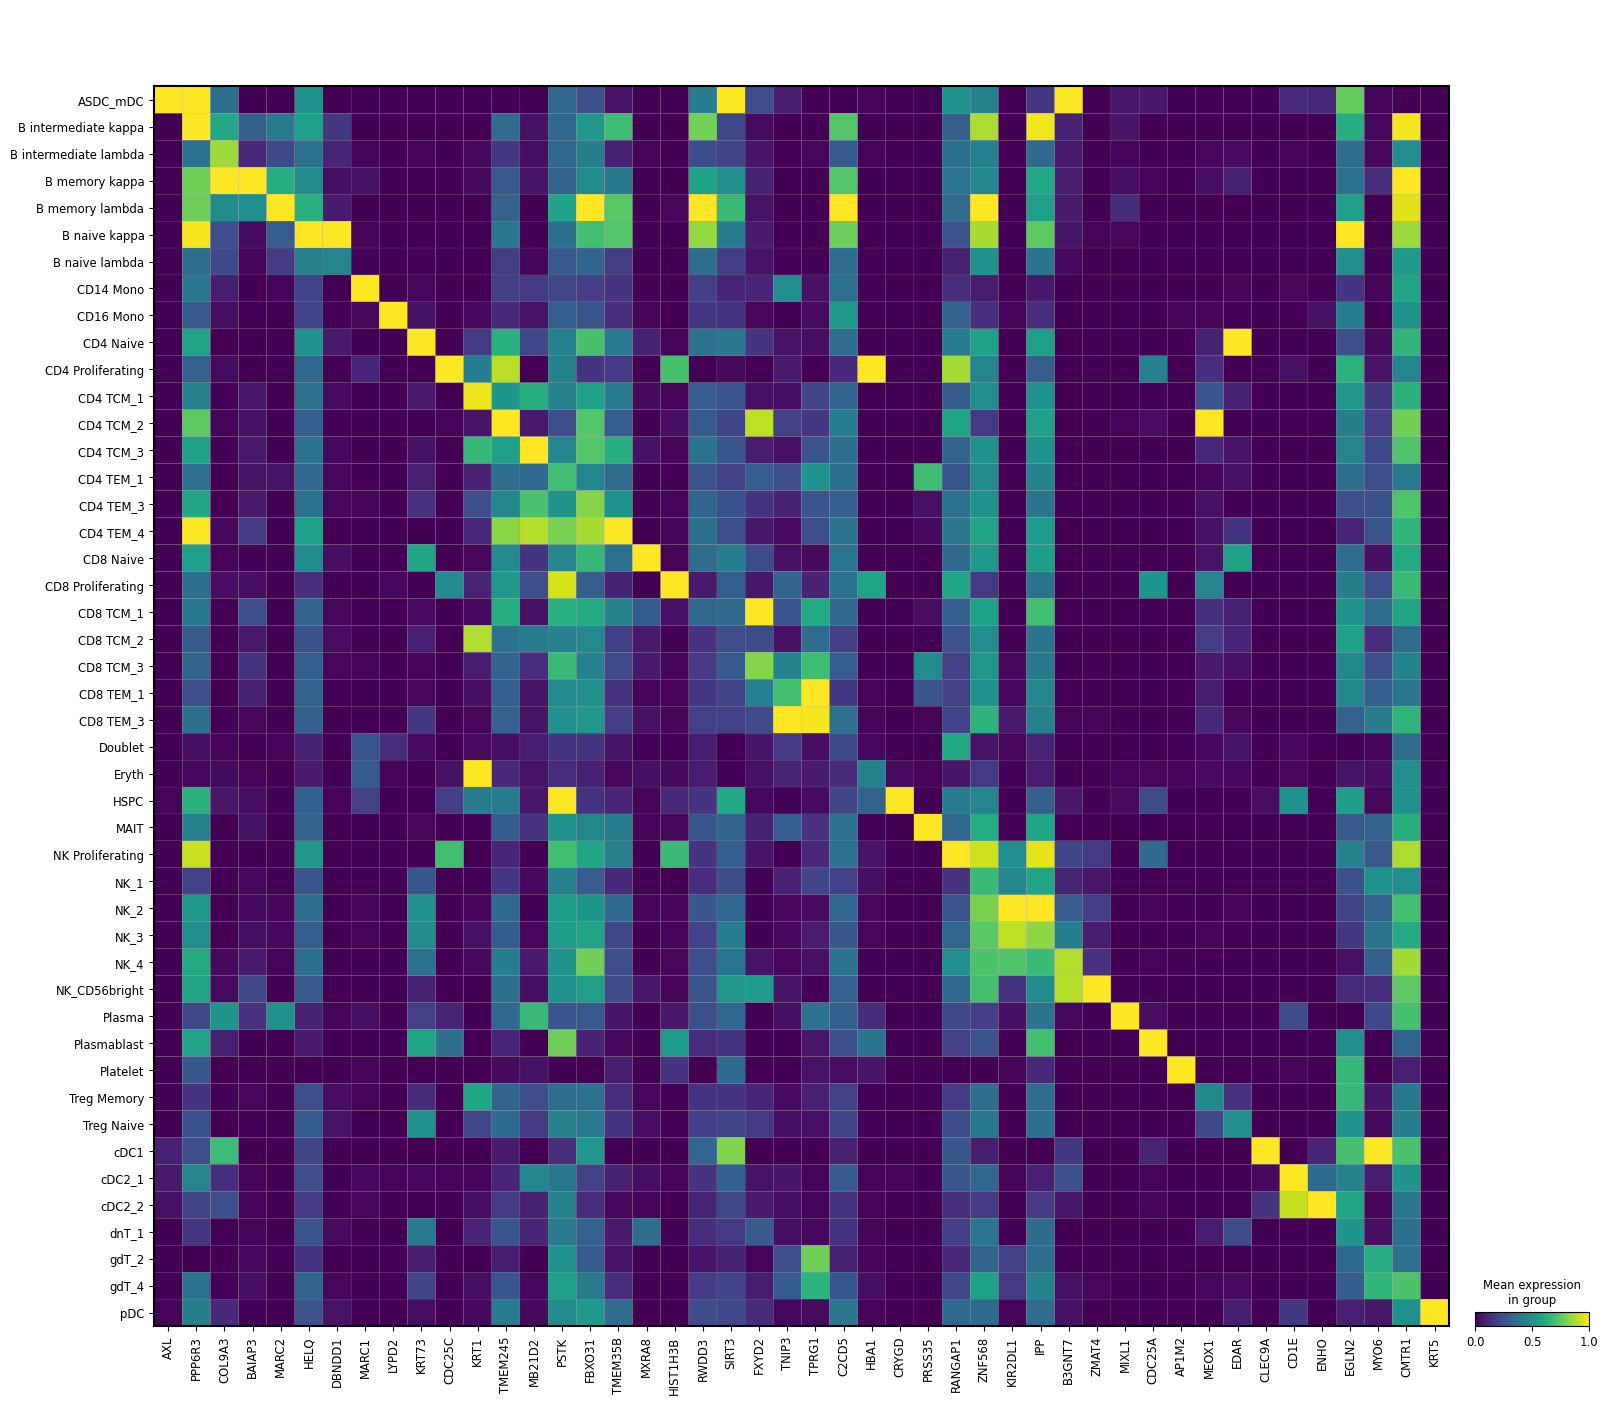

In [40]:
scherlock.plot_marker_heatmap(n_genes=1, column_ctype='cell_type',  cutoff=0,remove_ctype_no_marker=True)

In [7]:
def check_markers_in_adata(adata, markers):
    """
    Check which markers are present in the features of an AnnData object.
    
    Parameters:
    -----------
    adata : AnnData
        The AnnData object containing single-cell data
    markers : list
        List of marker gene names to check
    
    Returns:
    --------
    dict
        Dictionary with 'found' and 'not_found' lists of markers
    """
    # Get all feature names from adata
    all_features = set(adata.var_names)
    
    # Check which markers are in the features
    found_markers = []
    not_found_markers = []
    
    for marker in markers:
        if marker in all_features:
            found_markers.append(marker)
        else:
            not_found_markers.append(marker)
    
    # Print summary
    print(f"Found {len(found_markers)} out of {len(markers)} markers")
    print(f"Missing: {len(not_found_markers)} markers")
    
    return not_found_markers

# Usage example:
# Assuming you have an AnnData object named 'adata' and your markers list
identifiers = [
    "HAMP", "FNDC5", "IGLV4-69", "MUC16", "TAL2", "AC108879.1", "BMP3", 
    "LINC02218", "DOC2B", "SORCS3", "KIF20A", "AKAP12", "MTUS2", "FOXJ1", 
    "CHGB", "AL050344.1", "TFCP2L1", "AC100803.1", "AHSP", "PROM1", 
    "TTLL10", "RBM24", "TMSB15A", "VSTM2B", "GLI3", "ADGRG3", "LINC02363","GLDC", 
    "GSTA1", "FANK1", "RNF175", "ERICH5", "VSIG4", "CD207", "OGN", 
    "TRDV2", "CYP24A1", "RBM20", "COL26A1"
]

result = check_markers_in_adata(adata, identifiers)
# print("\nFound markers:")
# print(result["found"])
# print("\nNot found markers:")
# print(result["not_found"])
result

Found 32 out of 39 markers
Missing: 7 markers


['IGLV4-69',
 'AC108879.1',
 'LINC02218',
 'AL050344.1',
 'AC100803.1',
 'LINC02363',
 'TRDV2']

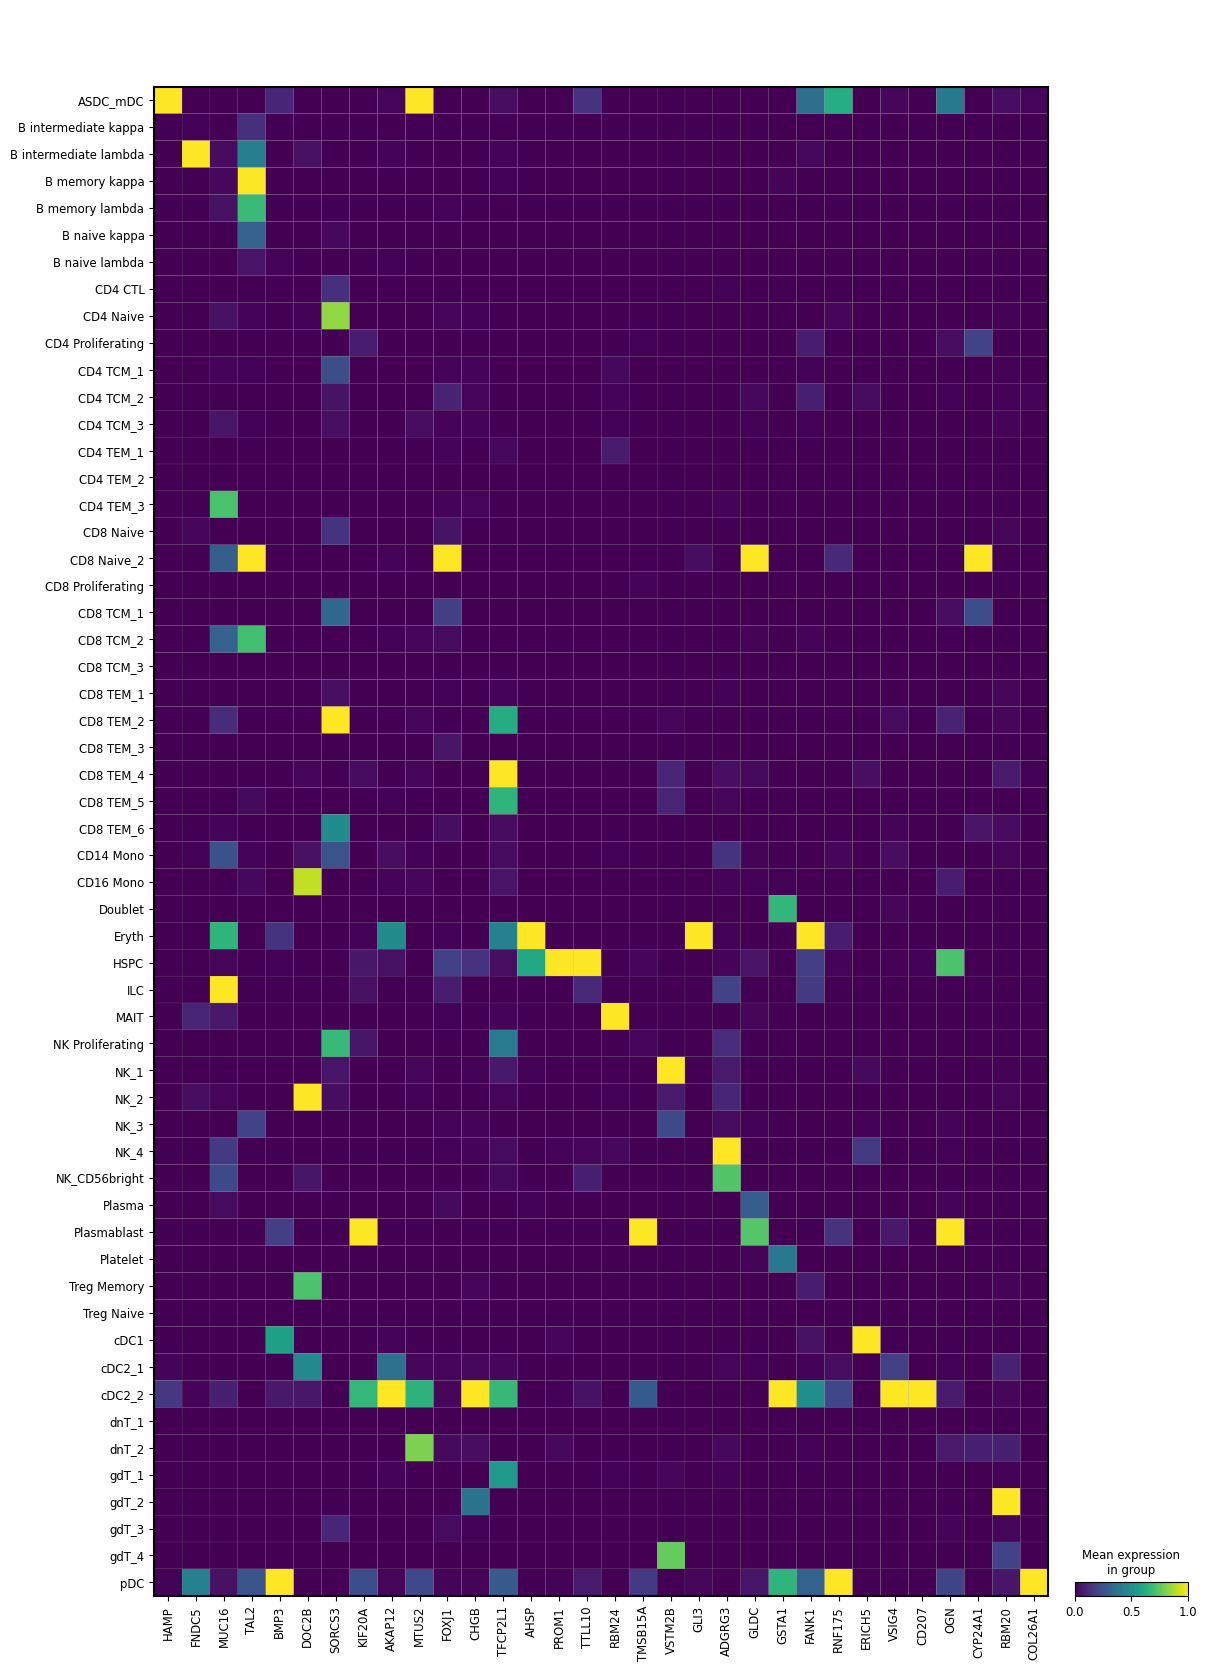

In [6]:

sc.pl.matrixplot(adata, groupby='predicted.celltype.l3', var_names=result, use_raw=False, standard_scale='var', cmap='viridis', swap_axes=False)

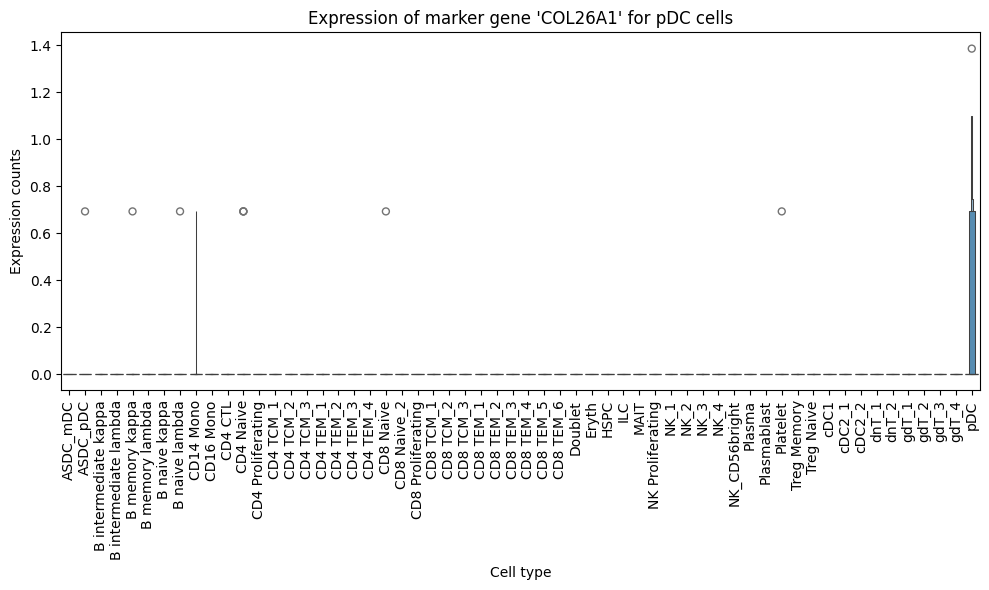

In [18]:
scherlock.visualize_marker(gene="COL26A1",column_ctype='celltype.l3')

In [19]:
fig = scherlock.plot_corr_theoric_empiric(min_genes=3)

TypeError: ScSherlock.plot_corr_theoric_empiric() missing 1 required positional argument: 'column_ctype'

## Exporting results 

In [8]:
ctype = 'CD14 Mono'
scherlock.get_scores('CD14 Mono', method='empiric')[ctype]

NameError: name 'scherlock' is not defined